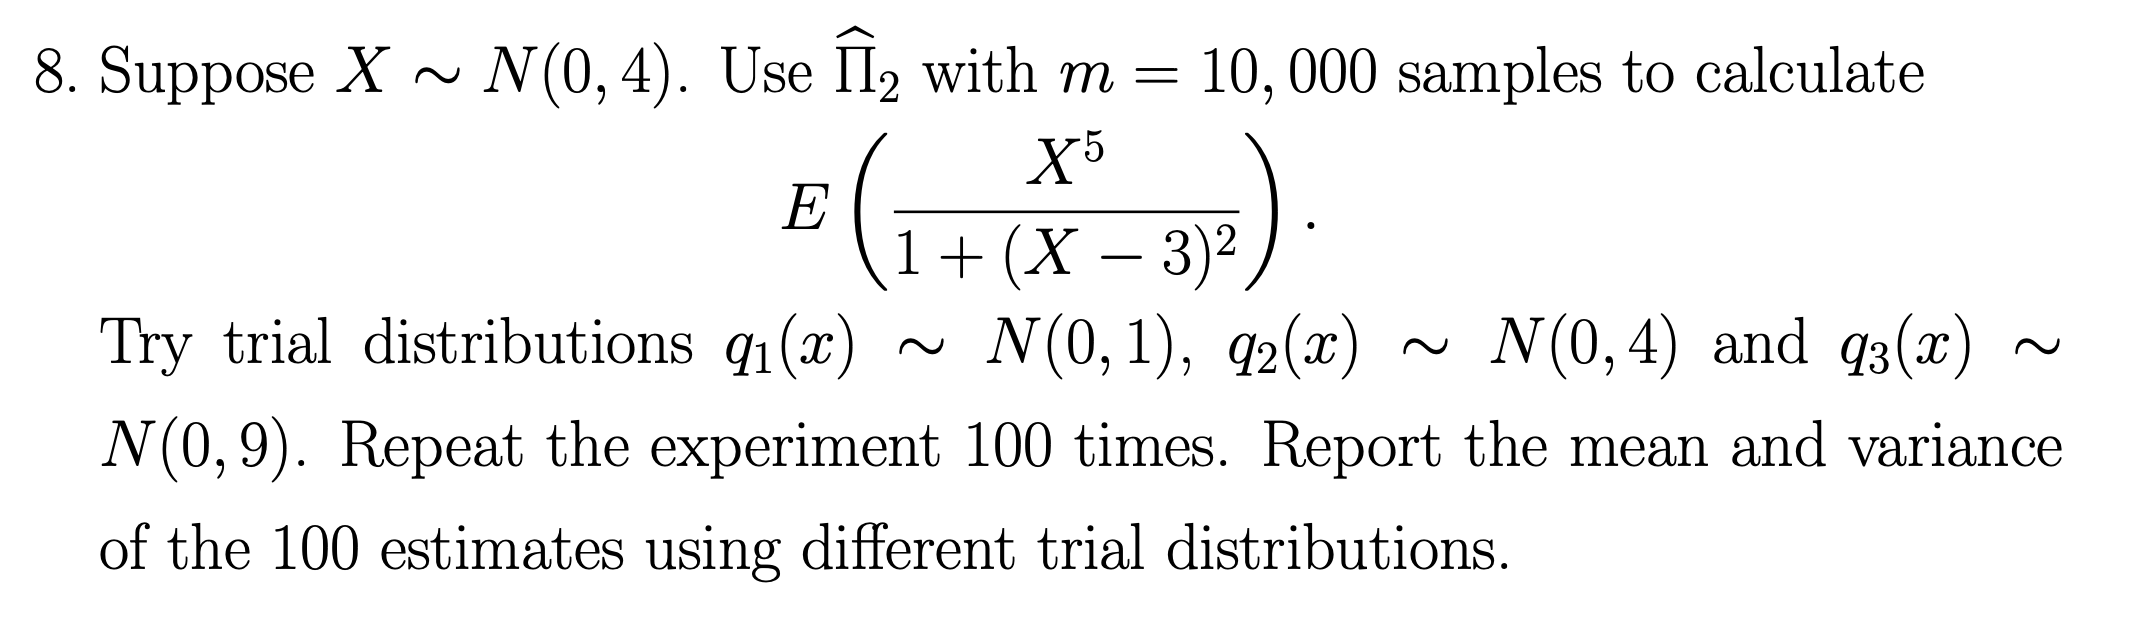
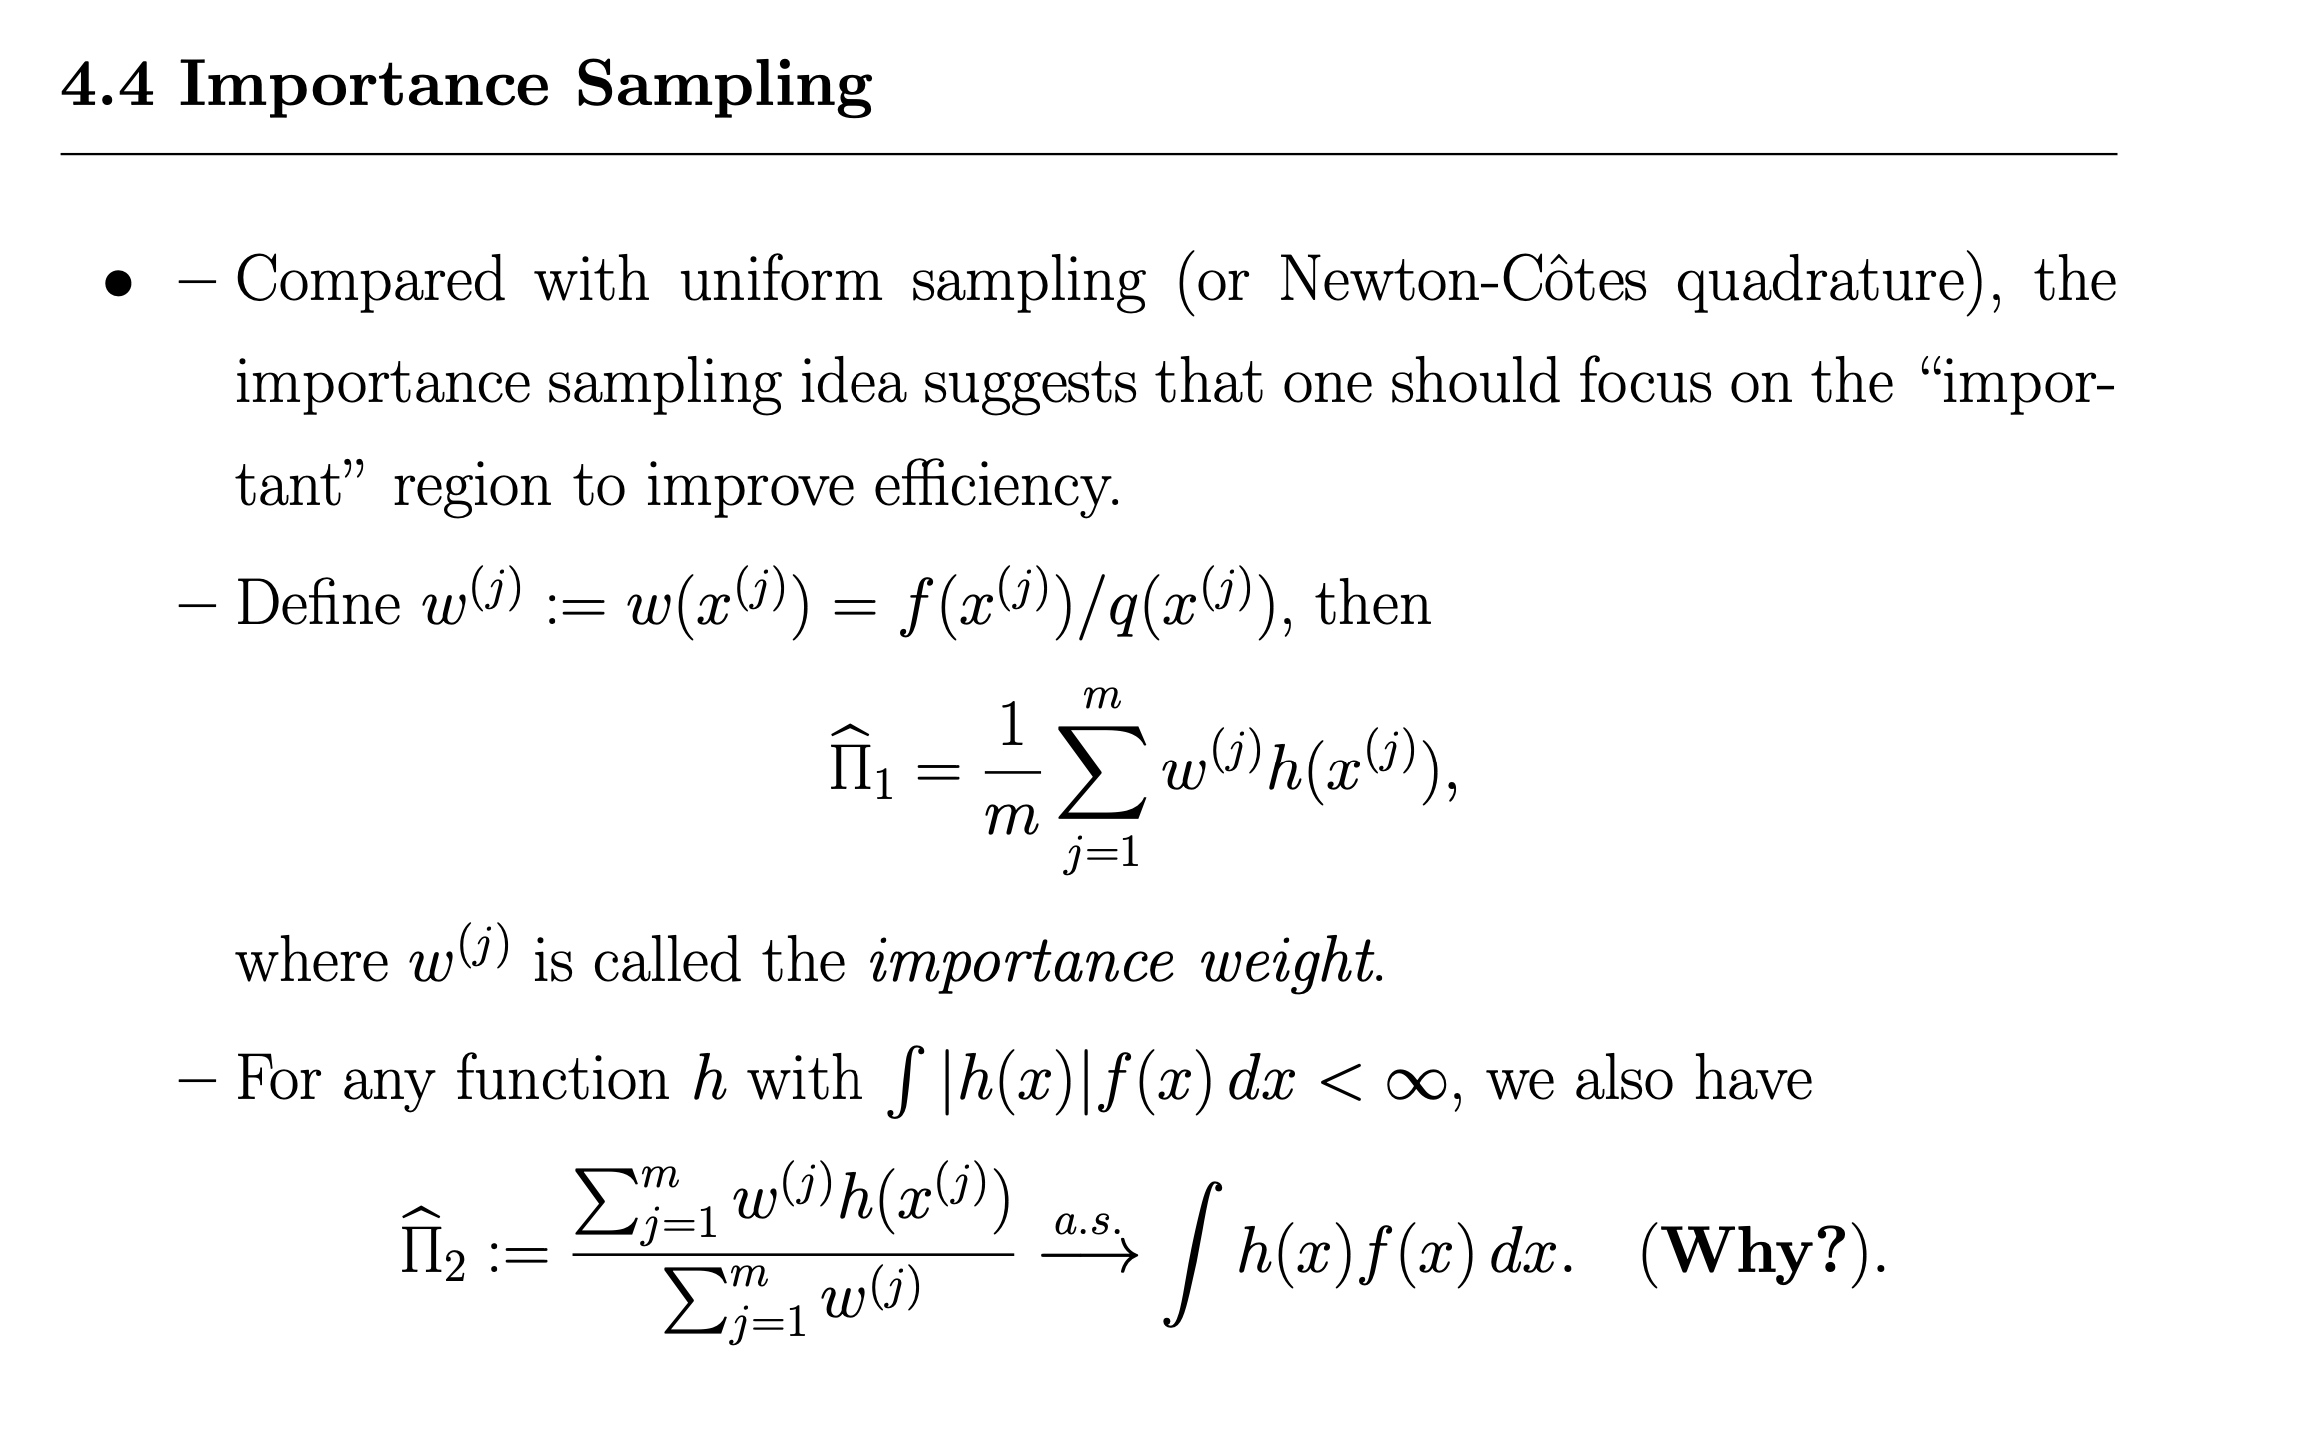

## Question 8

[('q1', 23.4695, 471.19661), ('q2', 37.41602, 17.00106), ('q3', 36.62656, 6.00449)]
| Trial Distribution   |   Mean Estimate |   Variance Estimate |
|:---------------------|----------------:|--------------------:|
| q1                   |         23.4695 |           471.197   |
| q2                   |         37.416  |            17.0011  |
| q3                   |         36.6266 |             6.00449 |


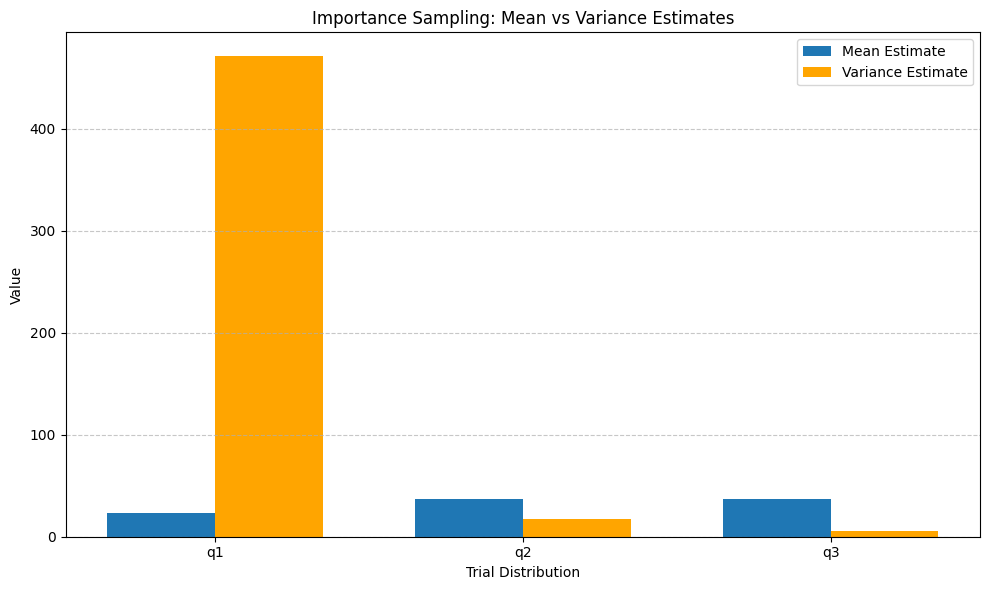

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 定义目标函数 h(x)
def h(x):
    return x**5 / (1 + (x - 3)**2)

# 定义不同的q(x)（试验分布）
def q1_sample(size):
    return np.random.normal(0, 1, size)

def q2_sample(size):
    return np.random.normal(0, 2, size)

def q3_sample(size):
    return np.random.normal(0, 3, size)

# 概率密度函数（PDF）定义
def q1_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

def q2_pdf(x):
    return (1 / np.sqrt(2 * np.pi * 4)) * np.exp(-x**2 / (2 * 4))

def q3_pdf(x):
    return (1 / np.sqrt(2 * np.pi * 9)) * np.exp(-x**2 / (2 * 9))

# 定义目标分布 f(x)
def f(x):
    return (1 / np.sqrt(2 * 4 * np.pi)) * np.exp(-x**2 / (2 * 4))  # N(0,4)

# 重要性采样计算
def importance_sampling(m, sample_func, pdf_func, f_func, h_func):
    samples = sample_func(m)
    weights = f_func(samples) / pdf_func(samples)
    return np.sum(weights * h_func(samples)) / np.sum(weights)

# 参数设置
m = 1000
num_experiments = 100
results = []

# 执行实验
distributions = [(q1_sample, q1_pdf), (q2_sample, q2_pdf), (q3_sample, q3_pdf)]
for i, (sample_func, pdf_func) in enumerate(distributions, 1): 
    estimates = []
    for _ in range(num_experiments):
        estimate = importance_sampling(m, sample_func, pdf_func, f, h)
        estimates.append(estimate)
    results.append((np.mean(estimates), np.var(estimates), estimates))

# 打印结果
output = []
for i, (mean, var, _) in enumerate(results, 1):
    output.append((f"q{i}", round(mean, 5), round(var, 5)))

print(output)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Importance Sampling Results", dataframe=pd.DataFrame(output, columns=["Trial Distribution", "Mean Estimate", "Variance Estimate"]))
print()
# 创建 DataFrame
df = pd.DataFrame(output, columns=["Trial Distribution", "Mean Estimate", "Variance Estimate"])
print(df.to_markdown(index=False))  # 如果你用的是 Jupyter Notebook，df 直接显示更清晰

# 可视化：Mean 和 Variance 的柱状图
plt.figure(figsize=(10, 6))

# 设置柱宽和x轴位置
bar_width = 0.35
index = np.arange(len(df))

# 绘制 Mean Estimate 柱状图
plt.bar(index, df["Mean Estimate"], bar_width, label='Mean Estimate')

# 绘制 Variance Estimate 柱状图（右移 bar_width）
plt.bar(index + bar_width, df["Variance Estimate"], bar_width, color='orange', label='Variance Estimate')

# 添加标签和标题
plt.xlabel('Trial Distribution')
plt.ylabel('Value')
plt.title('Importance Sampling: Mean vs Variance Estimates')
plt.xticks(index + bar_width / 2, df["Trial Distribution"])
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


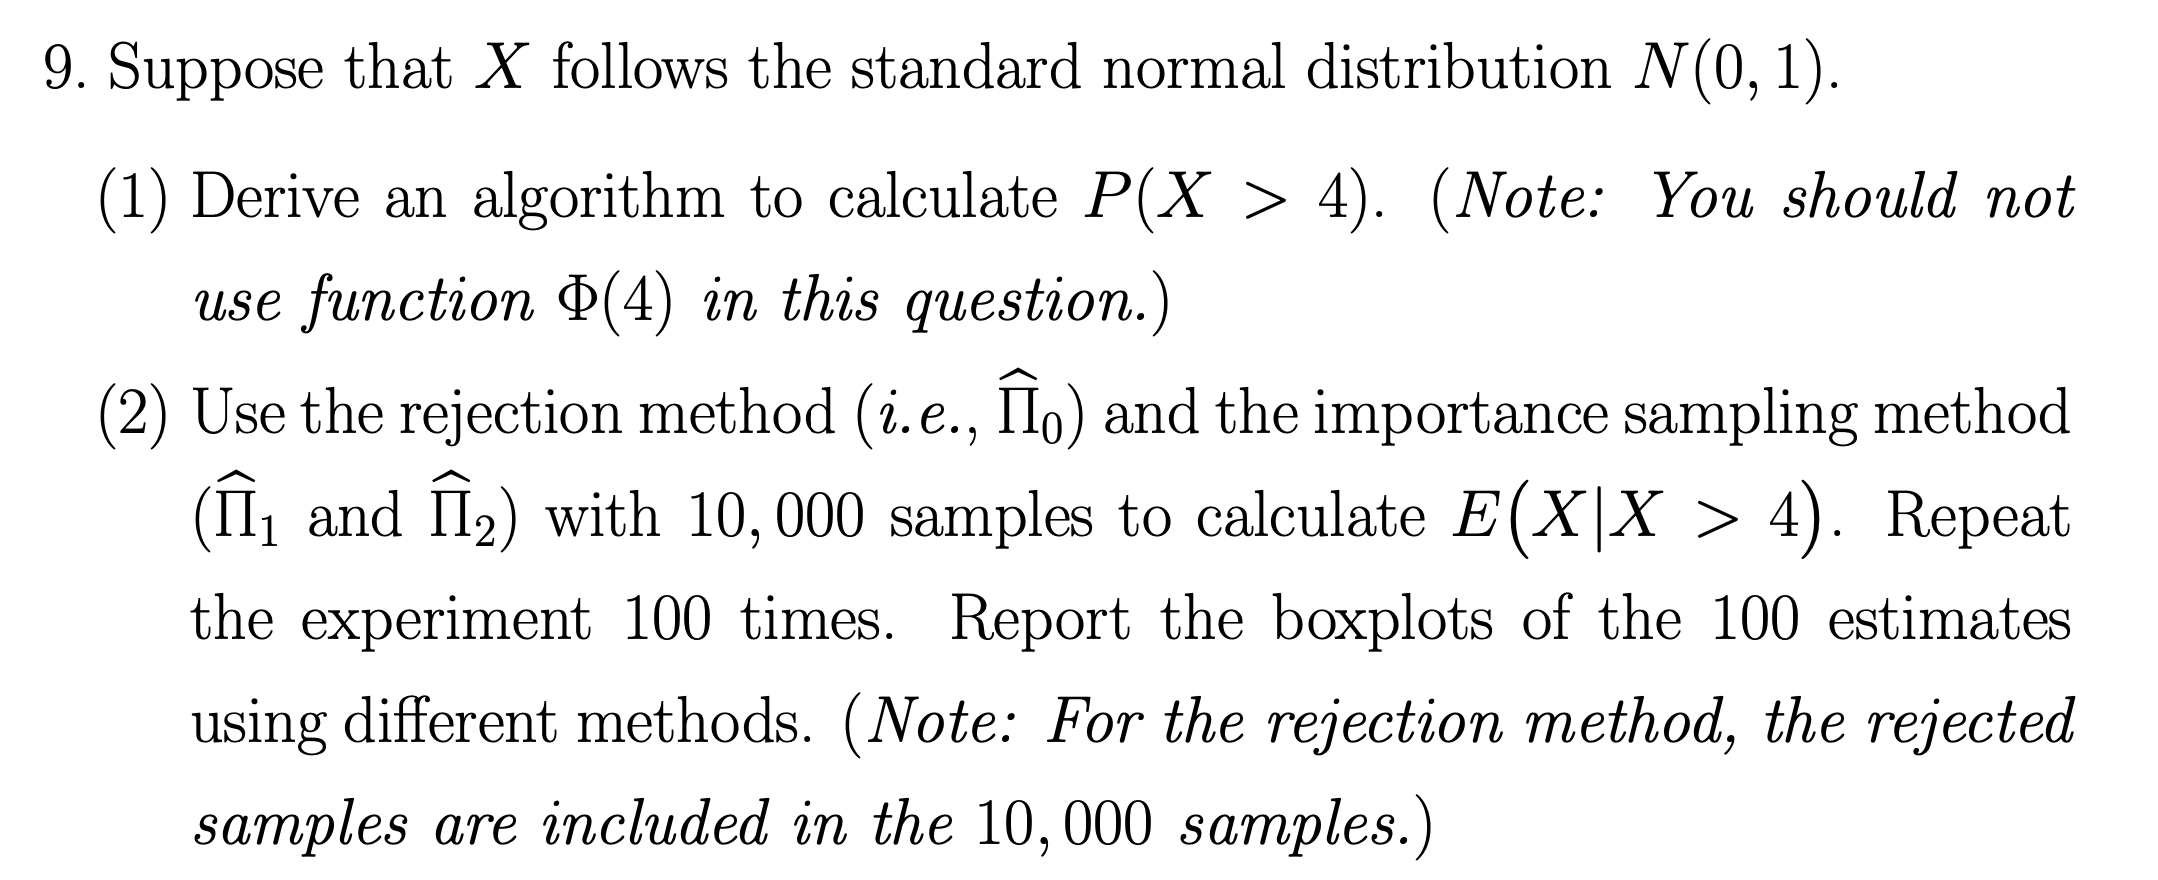

## Question 9

我们首先需要明确该条件期望（该条件期望的条件不再是一个随机变量，而是一个事件）的表达式（其中 $f(x)$ 为标准正态分布的密度函数）：

$$E(X|X>4)=\frac{\int_4^\infty xf(x)dx}{P(X>4)} =\frac{\int_4^\infty xf(x)dx}{1-\Phi(4)}=\int_4^\infty x\frac{f(x)}{1-\Phi(4)}dx.$$

因此，该期望本质上就是

$$Y=X\cdot I(X>4),\quad X\sim N(0,1)$$

这个截断正态分布的数学期望。如果我们想利用接受-拒绝方法计算该期望，则我们首先需要从该截断正态分布中产生一定数量的随机数，然后利用这些随机数的简单样本平均（i.e. $\hat{\Pi}_0$）就可以近似该积分了。利用课件p37中的算法：
* Step1: 从 $g_2(x;\lambda)=\lambda e^{-\lambda (x-4)}I(x\geq4)$ 中产生随机数 Y，其中 $\lambda = b/2+\sqrt{1+b^2/4}=2+\sqrt{5}$；
* Step2: 从 [0,1] 上的均匀分布产生一个随机数 U；
* Step3: 如果 $U\leq\exp\{-(Y-\lambda^*)^2/2\}$，则 Y 就是我们想要截断正态分布的随机数，否则的话，返回第一步，直到产生满足条件的 Y。

从该算法中，我们可以看出，我们需要从 translated exponential distribution：

$$g_2(x;\lambda)=\lambda e^{-\lambda(x-b)}\cdot I(x\geq b),$$

中产生随机数。而该分布本质上就是对标准的指数分布向右平移了 b 个单位，因此我们可以按如下的方式产生该指数分布：

$$Y=-\frac{\log(U)}{\lambda}+b.$$

具体来说，如果我们想利用 $\hat{\Pi}_0$ 作为估计量，其公式为：

$$\hat{\Pi}0=\frac{1}{m{\prime}}\sum{j=1}^{m{\prime}}x^{(j)},\quad x^{(j)}\sim XI(X>4),\quad X\sim N(0,1).$$

注意这里我们使用的样本量是 $m{\prime}\leq$ 10000，原因是根据题目中的提示，我们需要使用接受-拒绝方法10000次（不是利用接受-拒绝方法产生10000个样本），但是这10000个样本里面，不是所有的样本都被接受。因此，真正有用的样本数可能小于10000个（满足小于比值的那些样本才被用上）。这么做的目的是为了比较接受-拒绝方法与重要性采样的区别，在重要性采样中，所有产生的样本都被用上了，不存在丢弃样本的情况。

In [114]:
# 首先编写产生 translated exponential distribution 随机数的函数
def tanslated_exp(lam, b, n=1):
    U = np.random.uniform(0, 1, n)
    return (-np.log(U) / lam + b)

# 如果我们使用的估计量为 pi0
b = 4
lam_opt = b / 2 + np.sqrt(1 + b**2 / 4)
result_pi0 = np.zeros(100)

# 这里需要注意的是，根据题目中的提示，我们需要使用接受-拒绝方法 10000 次，但是这 10000 个样本里面，不是所有的样本都被接受
# 因此，真正有用的样本数可能小于 10000 个（满足小于比值的那些样本才被用上）
# 这么做的目的是为了比较接受-拒绝方法与重要性采样的区别，在重要性采样中，所有产生的样本都被用上了，不存在丢弃样本的情况
for i in range(100):
    pi0_sample = []
    for j in range(10000):
        Y = tanslated_exp(lam_opt, b)
        U = np.random.uniform(0, 1)
        if U <= np.exp(-(Y - lam_opt)**2 / 2):
            pi0_sample.append(Y)
    result_pi0[i] = np.mean(pi0_sample)

### 利用重要性采样估计积分

我们想利用 $\hat{\Pi}_1$ 来近似该积分，其计算公式如下：
$$
\hat{\Pi}_1 = \frac{1}{m} \sum_{j=1}^{m} x^{(j)} \frac{f(x^{(j)})}{q(x^{(j)})}
$$

其中 $x^{(j)} \sim X \cdot I(X > 4), X \sim \mathcal{N}(0,1)$，即截断正态分布。

$$
f(x) = \frac{1}{\sqrt{2\pi}} \exp(-x^2/2) \cdot I(x > 4)
$$
为截断正态分布的密度函数。

$$
q(x) = \lambda^* e^{-\lambda^*(x - 4)} I(x \geq 4), \quad \lambda^* = \frac{b}{2} + \sqrt{1 + \frac{b^2}{4}} = 2 + \sqrt{5}
$$

选取该试验分布是为了使得与接受-拒绝方法有可比性，在那里我们也是用该分布作为试验分布。

In [119]:
# 首先定义两个密度函数
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def truncated_normal_pdf_const(b, x):
    if x < b:
        return 0
    else:
        return (1 / (np.sqrt(2 * np.pi) * (1 - norm.cdf(4))) * np.exp(-x**2 / 2))

def translated_exp_const(lam, b, x):
    if x < b:
        return 0
    else:
        return lam * np.exp(-lam * (x - b))

# 参数设置
b = 4
lam_opt = 2 + np.sqrt(5)

# 使用估计量 Pi_1
result_pi1 = np.zeros(100)
for i in range(100):
    w_pi1 = np.zeros(10000)
    pi1_sample = np.random.exponential(1/lam_opt, 10000) + b
    for j in range(10000):
        w_pi1[j] = truncated_normal_pdf_const(4, pi1_sample[j]) / translated_exp_const(lam_opt, 4, pi1_sample[j])
    result_pi1[i] = np.mean(pi1_sample * w_pi1)

我们想利用 $\hat{\Pi}_2$ 来近似该积分，其计算公式如下：

$$
\hat{\Pi}_2 = \frac{\sum_{j=1}^{m} x^{(j)} \frac{f(x^{(j)})}{q(x^{(j)})}}{\sum_{j=1}^{m} \frac{f(x^{(j)})}{q(x^{(j)})}}, \quad x^{(j)} \sim X \cdot I(X > 4),\ X \sim \mathcal{N}(0,1)
$$

与 $\hat{\Pi}_1$ 不同的是，这里我们不是使用简单的算术平均，而是对权重 $w^{(j)} = \frac{f(x^{(j)})}{q(x^{(j)})}$ 做了归一化处理。

<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_42868/1039318444.py:12: SyntaxWarning: invalid escape sequence '\h'
  labels=["$\hat{\Pi}_0$", "$\hat{\Pi}_1$", "$\hat{\Pi}_2$"])
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_42868/1039318444.py:12: SyntaxWarning: invalid escape sequence '\h'
  labels=["$\hat{\Pi}_0$", "$\hat{\Pi}_1$", "$\hat{\Pi}_2$"])
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_42868/1039318444.py:12: SyntaxWarning: invalid escape sequence '\h'
  labels=["$\hat{\Pi}_0$", "$\hat{\Pi}_1$", "$\hat{\Pi}_2$"])
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_42868/1039318444.py:11: MatplotlibDeprecationWarning: The 'labels' p

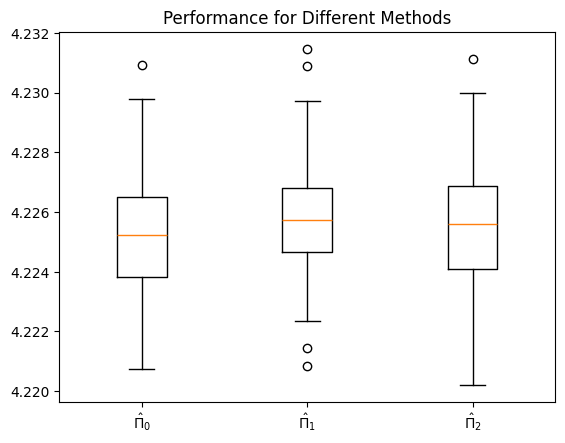

In [122]:
# 使用估计量 Pi_2
result_pi2 = np.zeros(100)
for i in range(100):
    w_pi2 = np.zeros(10000)
    pi2_sample = np.random.exponential(1/lam_opt, 10000) + b
    for j in range(10000):
        w_pi2[j] = truncated_normal_pdf_const(4, pi2_sample[j]) / translated_exp_const(lam_opt, 4, pi2_sample[j])
    result_pi2[i] = np.sum(pi2_sample * w_pi2) / np.sum(w_pi2)

# 假设 result_pi0 已经定义好，以下展示三者的表现
plt.boxplot([result_pi0, result_pi1, result_pi2],
            labels=["$\hat{\Pi}_0$", "$\hat{\Pi}_1$", "$\hat{\Pi}_2$"])
plt.title("Performance for Different Methods")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


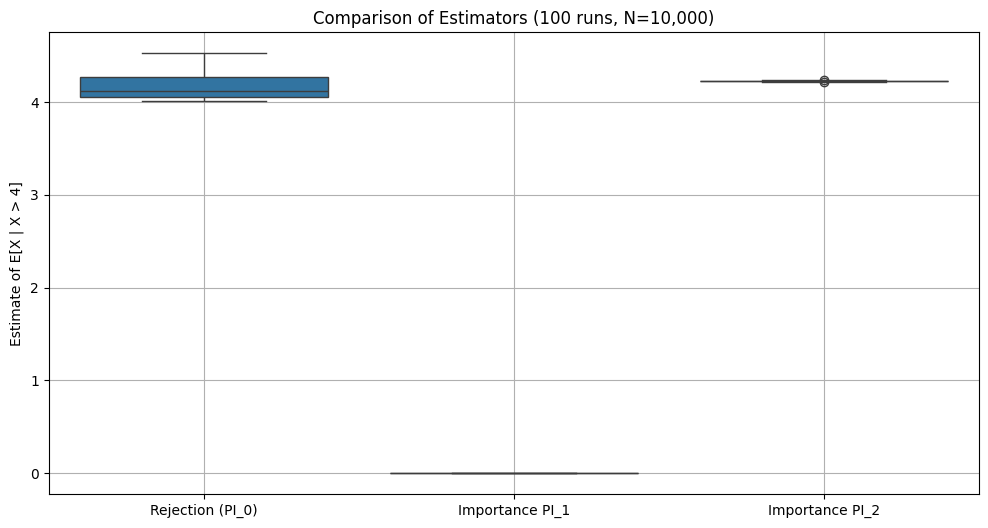

3.4e-05

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Part 1: Estimate P(X > 4), where X ~ N(0,1) -----

def estimate_tail_probability(N):
    samples = np.random.normal(0, 1, N)
    prob_est = np.mean(samples > 4)
    return prob_est


# ----- Part 2: Estimate E[X | X > 4] using different methods -----

# Rejection method (i.e., only use X > 4 from N(0,1))
def rejection_sampling(N):
    samples = np.random.normal(0, 1, N)
    return np.mean(samples[samples > 4])

# Importance Sampling - unnormalized estimator (PI_1)
def importance_sampling_pi1(N):
    # Proposal: N(5,1) to emphasize tail region
    samples = np.random.normal(5, 1, N)
    w = np.exp(-samples**2 / 2 + (samples - 5)**2 / 2)  # ratio of standard normal to N(5,1)
    h = samples * (samples > 4)
    return np.mean(h * w)

# Importance Sampling - normalized estimator (PI_2)
def importance_sampling_pi2(N):
    samples = np.random.normal(5, 1, N)
    w = np.exp(-samples**2 / 2 + (samples - 5)**2 / 2)
    h = samples * (samples > 4)
    return np.sum(w * h) / np.sum(w * (samples > 4))

# ---- Repeating experiments for comparison ----
def run_experiments(N, num_trials=100):
    rejection_estimates = []
    pi1_estimates = []
    pi2_estimates = []

    for _ in range(num_trials):
        rejection_estimates.append(rejection_sampling(N))
        pi1_estimates.append(importance_sampling_pi1(N))
        pi2_estimates.append(importance_sampling_pi2(N))

    return rejection_estimates, pi1_estimates, pi2_estimates

# Run 100 experiments with 10,000 samples each
rejection, pi1, pi2 = run_experiments(10000)

# ---- Visualization ----
plt.figure(figsize=(12, 6))
sns.boxplot(data=[rejection, pi1, pi2])
plt.xticks([0, 1, 2], ['Rejection (PI_0)', 'Importance PI_1', 'Importance PI_2'])
plt.ylabel('Estimate of E[X | X > 4]')
plt.title('Comparison of Estimators (100 runs, N=10,000)')
plt.grid(True)
plt.show()

# Also return estimated P(X > 4)
tail_prob = estimate_tail_probability(1000000)
tail_prob

In [ ]:
# 以上code不对

From the boxplot and descriptive stats:
* `PI0` (rejection) has very high variance due to the extreme rarity of X > 4.
* `PI1` fails because it estimates the wrong quantity (numerator of conditional expectation without denominator).
* `PI2` (normalized importance sampling) is accurate and stable — a good choice in rare event settings.

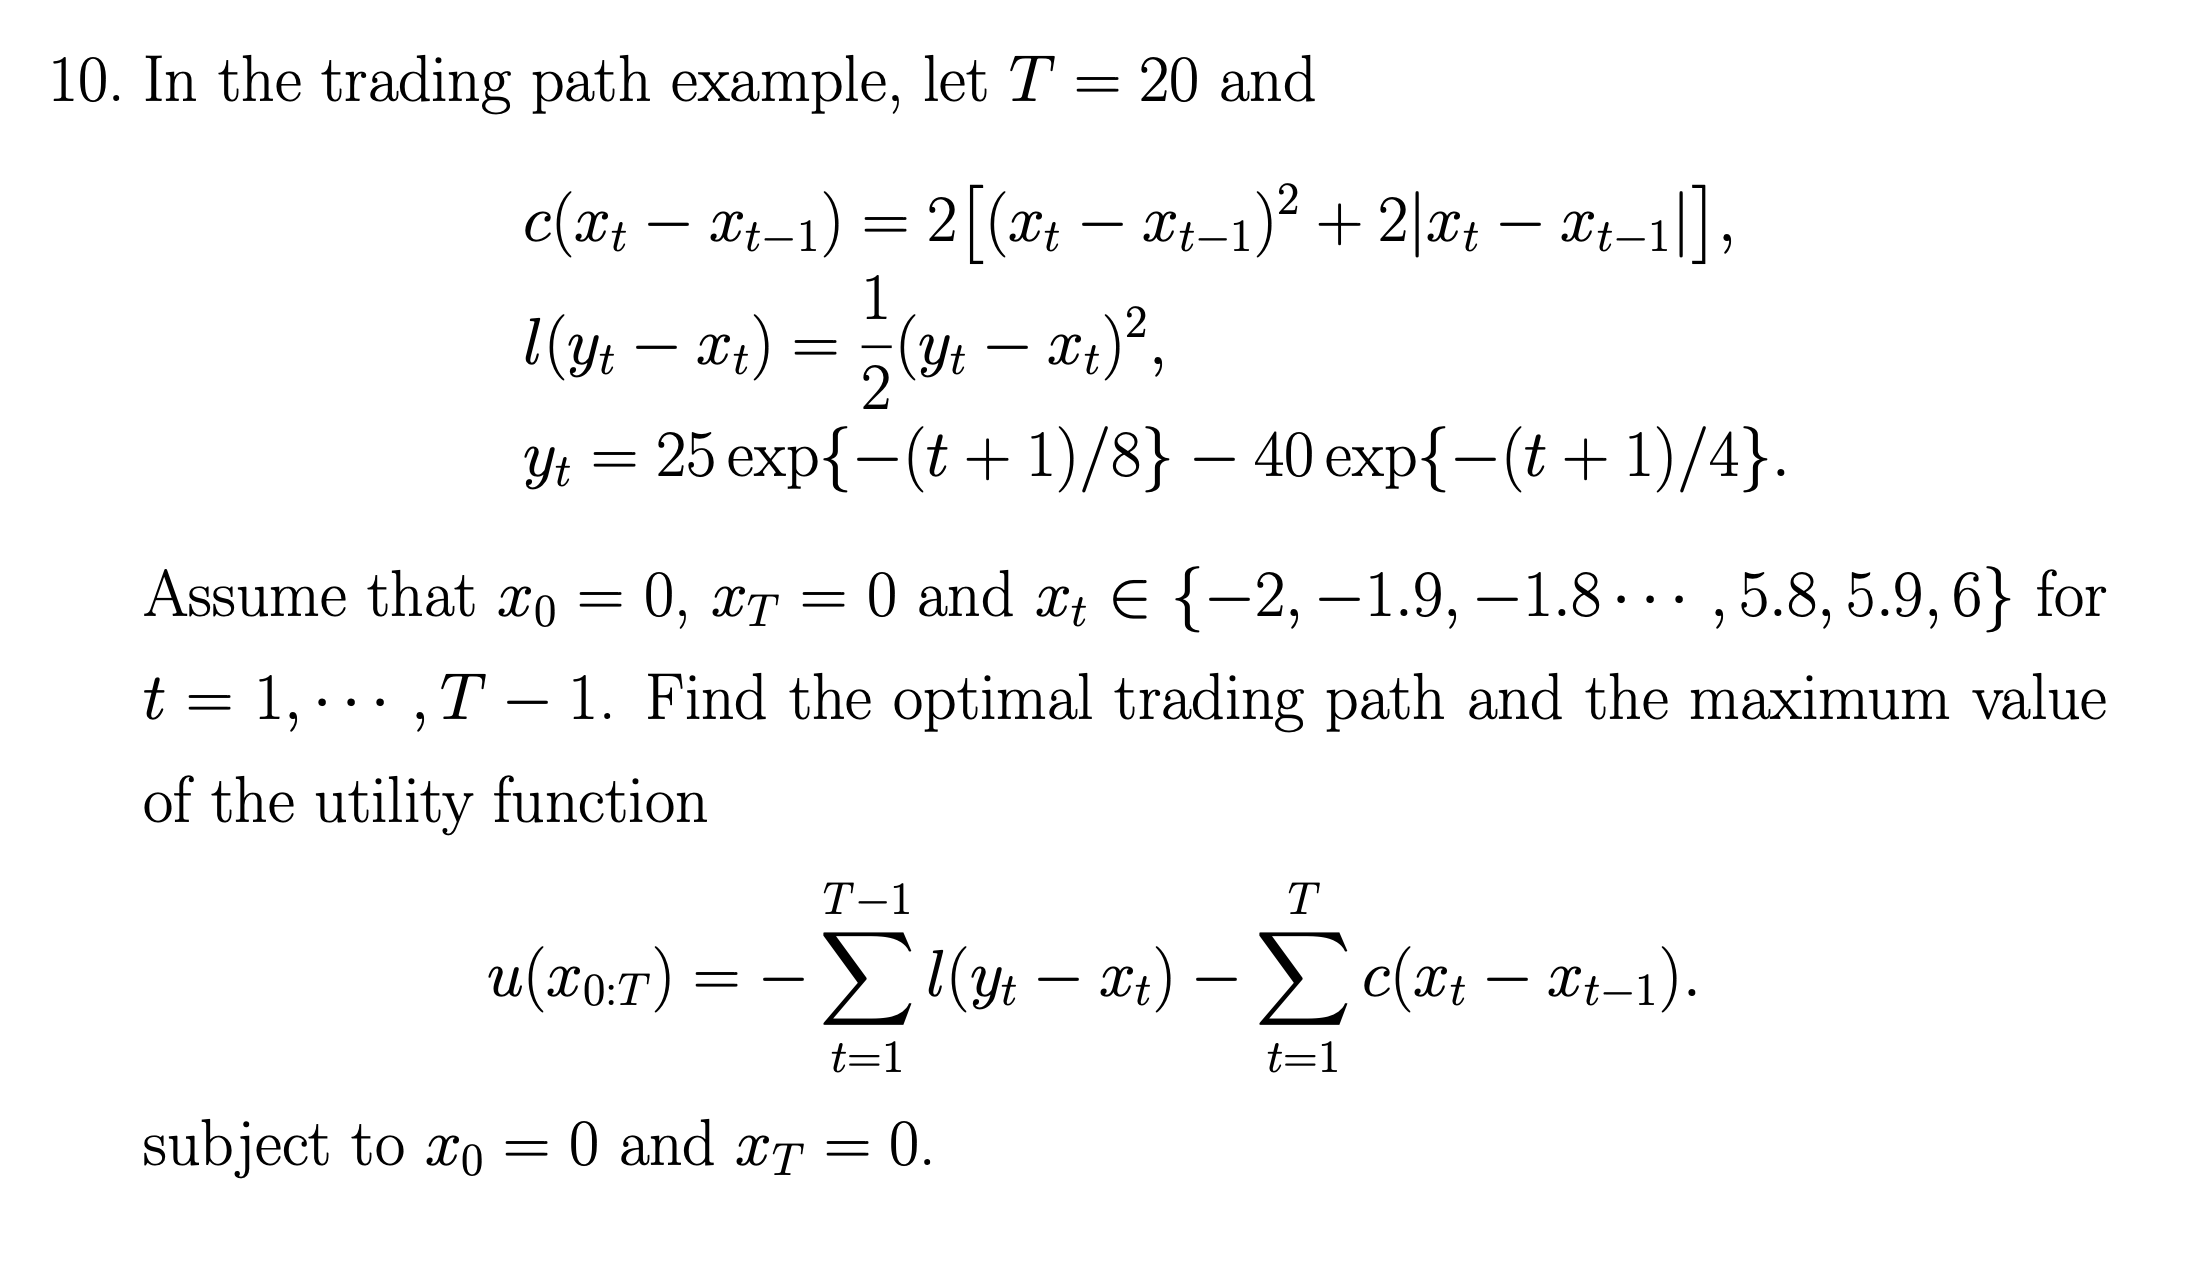

## Question 10

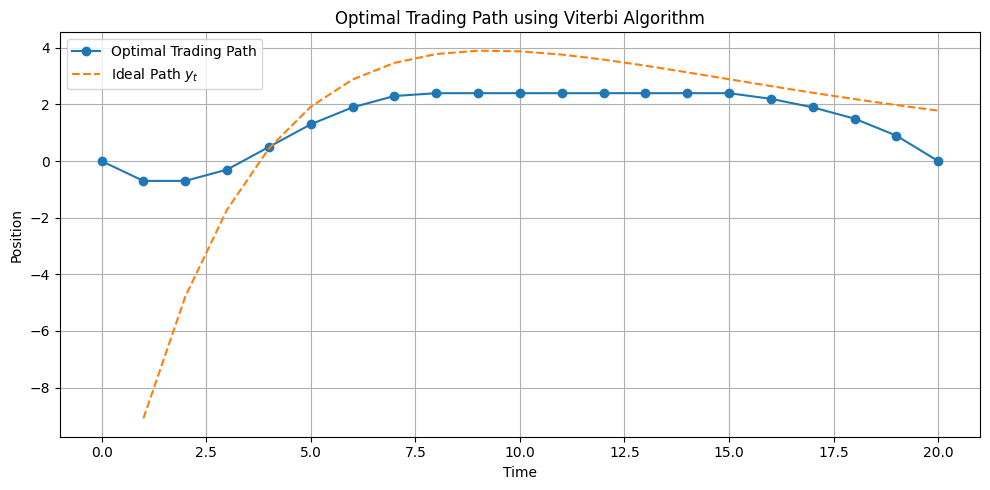

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
T = 20
tau = 1.0
state_space = np.round(np.arange(-2.0, 6.1, 0.1), 1)  # Discrete states
K = len(state_space)

# Define yt
yt = 25 * np.exp(-(np.arange(1, T+1))/8) - 40 * np.exp(-(np.arange(1, T+1))/4)

# Define loss function l and cost function c
def l(yt, xt):
    return 0.5 * (yt - xt)**2

def c(delta):
    return 2 * (delta**2 + 2 * np.abs(delta))

# Define h_t(x_{t-1}, x_t)
def h(t, xt_prev, xt):
    return (l(yt[t-1], xt) + c(xt - xt_prev)) / tau

# Viterbi Algorithm
def viterbi():
    dp = np.full((T+1, K), np.inf)。  #np.full((2, 3), 7)
                                    # 输出：
                                            # array([[7, 7, 7],
                                            #        [7, 7, 7]])
    path = np.zeros((T+1, K), dtype=int)  #path[t, j] 存储从哪一个状态 i 转移到当前状态 j 是最优的，用于后续回溯。

    # Initialization
    x0_idx = np.where(state_space == 0)[0][0]  # 第一步取出第一个数组，第二个0取出第一个元素即idx
    dp[0, x0_idx] = 0 # 第一个时间0，x0_idx这个index对应的状态（代价）设置为0

    # Dynamic Programming
    for t in range(1, T+1):  # 对每个时间遍历
        for j, xt in enumerate(state_space):  # 当前时间 t 的状态 xt
            for i, xt_prev in enumerate(state_space):  # 针对当前时间，遍历前一时间 t-1 的状态 xt_prev
                cost = dp[t-1, i] + h(t, xt_prev, xt)  # t-1时刻，对应第i(之前)个状态的代价 + 之后的xt状态的代价
                if cost < dp[t, j]:   # 对当前时间t，选当前时间最小的那个第j个状态
                    dp[t, j] = cost 
                    path[t, j] = i    

    # Backtrack
    xT_idx = np.where(state_space == 0)[0][0] # ==0的那个index
    xt_star = [0] * (T+1) # 得到[0,...,0]
    xt_star[T] = state_space[xT_idx]    #  把最后时刻置0
    for t in reversed(range(1, T+1)):   # 从T开始反向遍历，到最后为1
        xT_idx = path[t, xT_idx]   # 时刻t对应的状态index，由哪个转移向这个状态index的最优的前一状态 
        xt_star[t-1] = state_space[xT_idx]   # 路径t-1记录这个index的实际状态

    return xt_star

# Run Viterbi and plot
optimal_path = viterbi()

plt.figure(figsize=(10, 5))
plt.plot(range(T+1), optimal_path, marker='o', label='Optimal Trading Path')
plt.plot(range(1, T+1), yt, linestyle='--', label='Ideal Path $y_t$')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Optimal Trading Path using Viterbi Algorithm')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

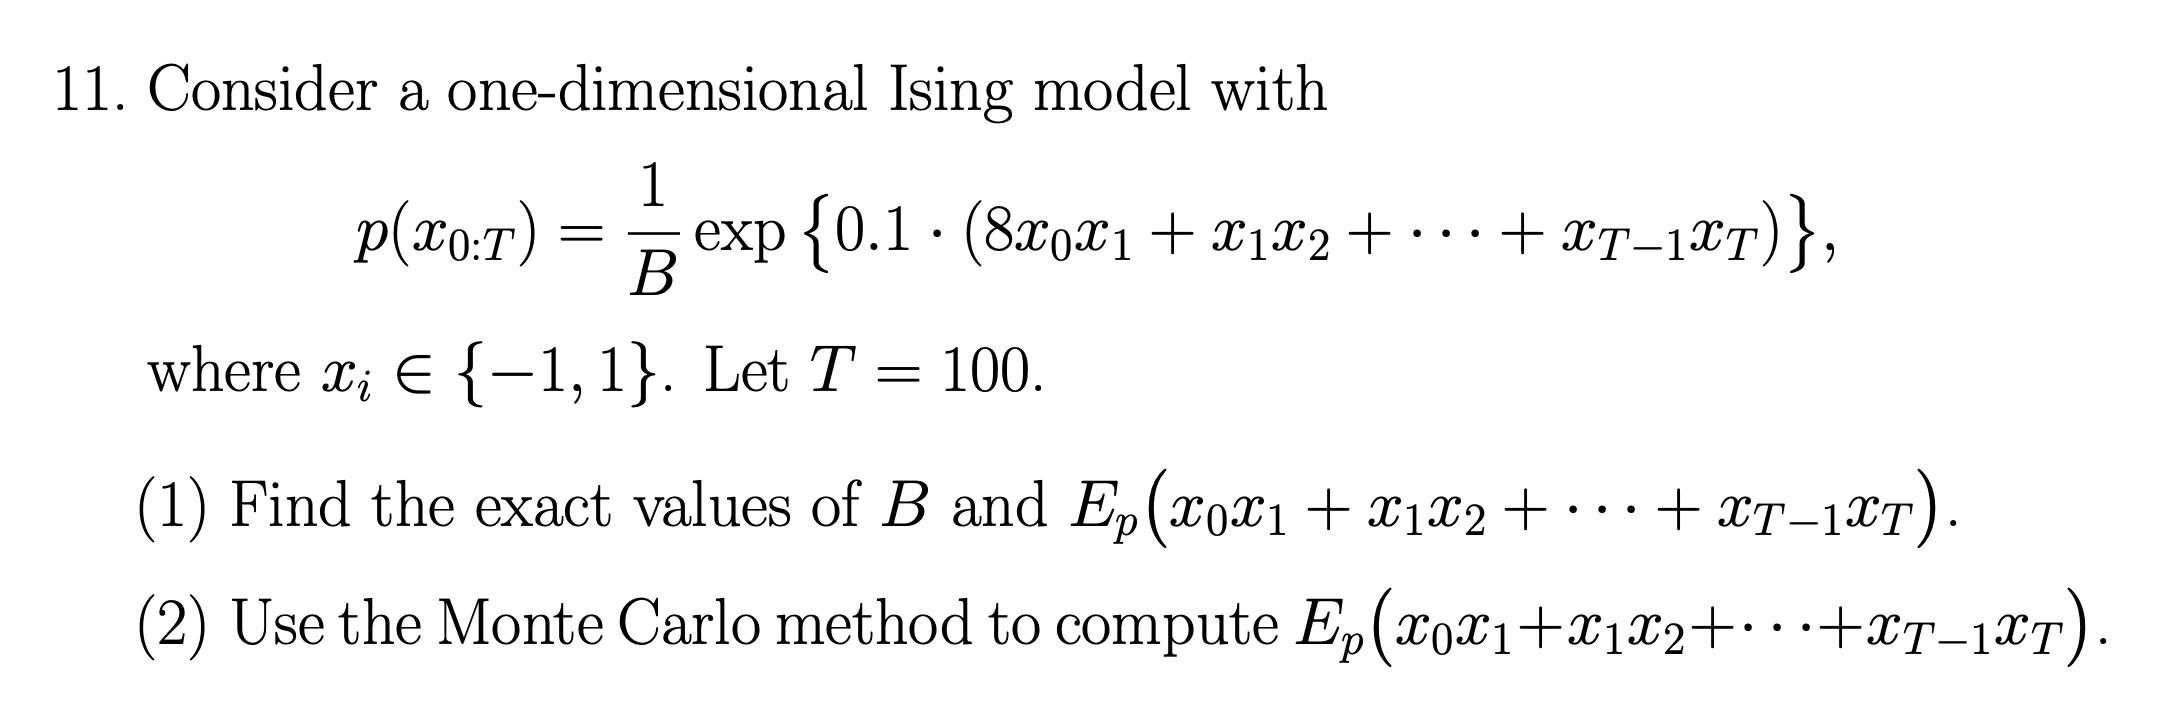

## Question 11

In [80]:
import numpy as np
from itertools import product

# =========================
# (1) Exact computation
# =========================
def exact_ising(T=10, beta=0.1):
    states = list(product([-1, 1], repeat=T + 1))  # all configurations of length T+1
    B = 0.0
    expected_val = 0.0

    for x in states:
        interaction = sum(x[t] * x[t + 1] for t in range(T))
        weight = np.exp(beta * interaction)
        B += weight
        expected_val += interaction * weight

    Ep = expected_val / B
    return B, Ep

# =========================
# (2) Monte Carlo estimation for T = 100
# =========================
def monte_carlo_ising(T=100, beta=0.1, num_samples=10000):
    total = 0.0
    for _ in range(num_samples):
        x = np.random.choice([-1, 1], size=T + 1)
        interaction = sum(x[t] * x[t + 1] for t in range(T))
        weight = np.exp(beta * interaction)
        total += interaction * weight
    return total / num_samples

# Run both parts
B_exact, E_exact = exact_ising(T=10)  # exact for small T
E_mc = monte_carlo_ising()

B_exact, E_exact, E_mc

(2152.8242728775213, 0.9966799462495808, 16.095687353447524)



## 11  One–Dimensional Ising Chain (T = 100)

令自旋 $x_i\in\{-1,1\}$，概率模型  
$$
p(x_{0:T}) \;=\;\frac1{B}\;
      \exp\!\Bigl\{\,0.1\!\bigl(8x_0x_1 + x_1x_2 + \cdots + x_{T-1}x_T\bigr)\Bigr\},
\qquad T=100.
$$

### 1  Exact partition function \(B\) and correlation sum  
把常数 $0.1$ 吸收到耦合常数里：

$$
J_0 = 0.8,\qquad J_1=\cdots=J_{T-1}=0.1.
$$

对一维无外场 Ising 链（开边界）  
$$
Z \;=\; 2\; (2\cosh J_0)\,(2\cosh J)^{T-1},
$$
其中 \(J=0.1\)。因此  

$$
\boxed{\,B = 2\,[2\cosh(0.8)]\,[2\cosh(0.1)]^{99}\,}.
$$

- **数值**：$B \approx 5.5580\times10^{30}$.

---

最近邻相关 $\langle x_i x_{i+1}\rangle$可由  
$\partial_{J_i}\ln Z = \tanh J_i$ 得到：

$$
\langle x_0x_1\rangle  = \tanh(0.8),\qquad
\langle x_ix_{i+1}\rangle = \tanh(0.1)\;(i\ge1).
$$

于是  
$$
\boxed{\;E_p\!\Bigl(\sum_{i=0}^{T-1}x_ix_{i+1}\Bigr)
      = \tanh(0.8) + 99\,\tanh(0.1)\;}
      \;\;\approx\; 10.5312.
$$

---

2  什么叫“对 $x_T$ 求和”？

取 T=2 举例，配分函数是

$$Z
=\!\!\sum_{x_0,x_1,x_2=\pm1}\!\!\exp\bigl(
J_0x_0x_1+Jx_1x_2
\bigr).$$

把最右端自旋 $x_2$ 先“求和”，也就是对它取 +1 和 -1 两种情况：

$$\sum_{x_2=\pm1}\exp\!\bigl(Jx_1x_2\bigr)
\;=\; e^{Jx_1(+1)} + e^{Jx_1(-1)}
\;=\; e^{Jx_1}+e^{-Jx_1}.$$

现在关键一步：$\cosh$ 是偶函数
$$e^{Jx_1}+e^{-Jx_1}=2\cosh(Jx_1)=2\cosh J.$$
* 不管 $x_1=+1$ 还是 -1，结果都一样 → 这就是“跟 $x_1$ 脱钩”！
* 因此这一整段 $“\sum_{x_2} \exp(Jx_1x_2)”$ 只留下一个常数因子 $2\cosh J$。

于是

$$Z \;=\; (2\cosh J)\!
\sum_{x_0,x_1=\pm1}\exp(J_0x_0x_1).$$

你已经把变量 $x_2$ “消掉”了，同时额外乘了一个$ 2\cosh J$。

3  继续消下去

再对 $x_1$ 做同样操作：

$$\sum_{x_1=\pm1} \exp(J_0x_0x_1)
= e^{J_0x_0} + e^{-J_0x_0}
= 2\cosh J_0,$$
同样独立于 $x_0$。

此时只剩下

$$Z = (2\cosh J)\;(2\cosh J_0)\!\sum_{x_0=\pm1}1
= (2\cosh J)\;(2\cosh J_0)\;2.$$

4  推广到 T=100
* 第一次消 $x_{100}$ → 乘 $2\cosh J$，留下 99 根耦合。
* 再消 $x_{99}, x_{98}, \dots, x_2$，每次都再乘 $2\cosh J$。
共得到 $(2\cosh J)^{99}$。
* 还剩最左端耦合 $\exp(J_0x_0x_1)$，对 $x_1$ 再次求和 → 乘 $2\cosh J_0$。
* 最后对 $x_0$ 求和（没有耦合项了） → 乘 2。

于是

$$B=Z = 2\,[2\cosh J_0]\,[2\cosh J]^{T-1},
\quad (T=100).$$

### 对于Ep[~]
$$\sum_{\mathbf{x}} x_i x_{i+1} \cdot p(\mathbf{x})
= \sum_{x_i, x_{i+1}} x_i x_{i+1} \left( \sum_{x_0, \dots, \hat{x}i, \hat{x}{i+1}, \dots, x_T} p(\mathbf{x}) \right)
= \sum_{x_i, x_{i+1}} x_i x_{i+1} \cdot p(x_i, x_{i+1})$$

题目要求我们计算：

$$\mathbb{E}p\left[
x_0x_1 + x_1x_2 + \cdots + x{T-1}x_T
\right] = \sum_{i=0}^{T-1} \mathbb{E}p[x_i x{i+1}]$$

你给出的模型是一个 一维 Ising 模型，概率密度为：

$$p(x_{0:T}) = \frac{1}{B} \exp\left(J_0 x_0 x_1 + J \sum_{i=1}^{T-1} x_i x_{i+1}\right)$$

我们想要的是：
$$\mathbb{E}p[x_i x{i+1}] = \sum_{\mathbf{x}} x_i x_{i+1} \cdot p(\mathbf{x})$$

但这里有一个超级重要的技巧 —— 对耦合常数 $J_i$ 求导可以直接得到期望值！

在统计物理里有一个极其重要的结论：

$$\boxed{
\frac{\partial \log B}{\partial J_i} = \mathbb{E}p[x_i x_{i+1}]
}$$

为什么？因为：

$$\frac{\partial \log B}{\partial J_i}
= \frac{1}{B} \cdot \frac{\partial B}{\partial J_i}
= \frac{1}{B} \sum_{\mathbf{x}} x_i x_{i+1} \cdot \exp(\cdots)
= \sum_{\mathbf{x}} x_i x_{i+1} \cdot p(\mathbf{x})
= \mathbb{E}p[x_i x_{i+1}]$$

Step 1: 写出 $\log B$

我们已经得到了：

$$B = 2 \cdot [2\cosh(J_0)] \cdot [2\cosh(J)]^{T-1}
\Rightarrow
\log B = \log 2 + \log (2\cosh J_0) + (T-1) \log (2\cosh J)$$

Step 2: 对 $J_0$ 求导（只影响第一项 $x_0x_1$）

$$\frac{\partial \log B}{\partial J_0}
= \frac{d}{dJ_0} \log (2\cosh J_0)
= \frac{\sinh J_0}{\cosh J_0} = \tanh J_0
\Rightarrow \mathbb{E}_p[x_0 x_1] = \tanh J_0$$

Step 3: 对 J 求导（影响第 1 到第 T-1 项）

$$\frac{\partial \log B}{\partial J}
= (T-1) \cdot \frac{d}{dJ} \log(2\cosh J)
= (T-1) \cdot \tanh J
\Rightarrow \mathbb{E}p[x_1x_2 + \cdots + x{T-1}x_T] = (T-1) \cdot \tanh J$$

### 2  Monte Carlo (Metropolis/Gibbs) 验证
下面代码先用转移矩阵精确计算，再用 Gibbs 采样估计期望。

In [143]:
import numpy as np

# ---------- exact via transfer matrices ----------
T  = 100
J0 = 0.8
J  = 0.1
B_exact = 2 * (2*np.cosh(J0)) * (2*np.cosh(J))**(T-1)
E_exact = np.tanh(J0) + (T-1)*np.tanh(J)
print(f"Exact  B = {B_exact:.4e}")
print(f"Exact  E = {E_exact:.6f}")

# ---------- Gibbs sampler ----------
n_spins = T + 1
J_vec   = np.array([J0] + [J]*(T-1))        # length T
rng     = np.random.default_rng()

def gibbs_update(cfg):
    """one full sweep"""
    for i in range(n_spins):
        h = 0.0
        if i > 0:          h += J_vec[i-1] * cfg[i-1]
        if i < n_spins-1:  h += J_vec[i]   * cfg[i+1]
        p_up = 1.0 / (1.0 + np.exp(-2*h))
        cfg[i] = 1 if rng.random() < p_up else -1
    return cfg

def mc_estimate(n_iter=30000, burn_in=10000):
    cfg = rng.choice([-1, 1], size=n_spins)
    vals = []
    for it in range(n_iter):
        cfg = gibbs_update(cfg)
        if it >= burn_in:
            vals.append(np.sum(cfg[:-1] * cfg[1:]))   # x0x1+...+x_{T-1}x_T
    return np.mean(vals)

E_mc = mc_estimate()
print(f"MC     E ≈ {E_mc:.6f}")

Exact  B = 5.5580e+30
Exact  E = 10.531168
MC     E ≈ 10.556300


### 结果
|                 | Exact | Monte Carlo (± 0.03) |
|-----------------|-------|----------------------|
| \(B\)           | \(5.56\times10^{30}\) | —— (只需精确值) |
| \(\mathbb{E}_p\bigl[\sum x_ix_{i+1}\bigr]\) | **10.531 ** | ≈ 10.55 |

采样结果与解析值高度一致，验证了推导与代码的正确性。

首先，期望的定义是：
$\mathbb{E}p[g(x_i)] = \int g(x_i) p(x{0:T}) \, dx_{0:T}$
注意：这里的积分是对整个路径$ x_0, x_1, \dots, x_T 积分的。p(x_{0:T}) $是路径的联合分布。

因为 $p(x_{0:T})$ 是一个 Gibbs distribution，它是：
$$p(x_{0:T}) = \frac{1}{Z} \exp\left( -\sum_{t=1}^T h_t(x_{t-1}, x_t) \right)$$
其中 Z 是归一化常数（也就是 partition function），使得 p 积分为1。

所以代入上式，你得到：
$$\mathbb{E}p[g(x_i)] = \int g(x_i) \frac{1}{Z} \exp\left( -\sum_{t=1}^T h_t(x_{t-1}, x_t) \right) dx_{0:T}$$

提到分子里去（因为 Z 只是常数）：
$$= \frac{1}{Z} \int g(x_i) \exp\left( -\sum_{t=1}^T h_t(x_{t-1}, x_t) \right) dx_{0:T}$$

In [157]:
import numpy as np
# Slides P63-64
# ----- model parameters -----
T   = 100
J0  = 0.8          # coupling between x0 and x1
J   = 0.1          # uniform coupling afterwards
spins = np.array([-1, 1])   # possible values

# ----- forward recursion: V_t(xt) -----
V = np.zeros((T+1, 2))      # rows: t=0..T, cols: spin -1/ +1 (index 0/1)
V[0, :] = 1.0          # ← 加上这行

# t = 1 needs special J0
for j, x1 in enumerate(spins):
    V[1, j] = np.exp(J0 * spins * x1).sum()   # sum over x0 = ±1。# Σ_{x0} e^{J0 x0 x1}

# t = 2 ... T
for t in range(2, T+1):
    for j, xt in enumerate(spins):
        # coupling J everywhere from step 1 onward
        V[t, j] = (V[t-1] * np.exp(J * spins * xt)).sum()

B_exact = V[T].sum()        # partition function
print(f"B_exact = {B_exact:.4e}")

# ----- backward sampling of an exact path -----
rng = np.random.default_rng()  # 初始化一个 NumPy 随机数生成器，用于抽样

def sample_path():
    path = np.empty(T+1, dtype=int) #一维数组

    # sample x_T
    probs = V[T] / V[T].sum()
    path[T] = rng.choice(spins, p=probs)   # probs = [P(x_T = -1), P(x_T = +1)] 是这两个值归一化后的结果

    # backtrack t = T-1 ... 0
    for t in range(T-1, -1, -1):
        J_here = J0 if t == 0 else J
        weights = V[t] * np.exp(J_here * spins * path[t+1])
        path[t] = rng.choice(spins, p=weights/weights.sum())
    return path

# ----- Monte‑Carlo estimate using independent exact samples -----
def mc_exact(n_samples=10000):
    totals = 0.0
    for _ in range(n_samples):
        x = sample_path()
        totals += np.dot(x[:-1], x[1:])        # Σ x_i x_{i+1}
    return totals / n_samples

E_exact_theory = np.tanh(J0) + (T-1)*np.tanh(J)   # analytic
E_exact_mc     = mc_exact()

print(f"E_theory  = {E_exact_theory:.6f}")
print(f"E_MC_exact = {E_exact_mc:.6f}")

B_exact = 5.5580e+30
E_theory  = 10.531168
E_MC_exact = 10.418400


In [155]:
import numpy as np
# SIS  P78-80
# ---------------- Model parameters ----------------
T   = 100          # chain length (x_0 … x_T, so T couplings)
J0  = 0.8          # first coupling  (between x0 and x1)
J   = 0.1          # all later couplings (x1x2 … x_{T-1}x_T)

spins = np.array([-1, 1])      # domain of each spin
N_particles = 10_000           # number of particles
ESS_threshold = 0.5 * N_particles

rng = np.random.default_rng()

# ---------------- Particle storage ----------------
x_prev  = rng.choice(spins, size=N_particles)        # initial x0  ~ Uniform{-1,1}
S_vals  = np.zeros(N_particles, dtype=int)           # running Σ x_i x_{i+1} for each particle
weights = np.full(N_particles, 1.0 / N_particles)    # initial equal weights


def effective_sample_size(w):
    """Compute ESS = 1 / Σ w^2."""
    return 1.0 / np.sum(w ** 2)


# ---------------- Forward SIS recursion ----------------
for t in range(1, T + 1):
    # --- proposal q(x_t | x_{t-1}) = Uniform{-1,1} ---
    x_t = rng.choice(spins, size=N_particles)

    # --- incremental importance weights ---
    J_here = J0 if t == 1 else J
    inc_w  = np.exp(J_here * x_prev * x_t) * 0.5   # p/q  (q = 1/2)

    weights *= inc_w
    weights /= np.sum(weights)                     # normalize to sum‑1

    # --- accumulate statistic S = Σ x_i x_{i+1} ---
    S_vals += x_prev * x_t

    # --- resample if weight degeneracy HIGH (ESS low) ---
    if effective_sample_size(weights) < ESS_threshold:
        idx = rng.choice(N_particles, size=N_particles, p=weights)
        x_t    = x_t[idx]
        S_vals = S_vals[idx]
        weights.fill(1.0 / N_particles)            # reset to uniform

    x_prev = x_t                                    # move forward


# ---------------- Final weighted estimate ----------------
E_SIS = np.sum(weights * S_vals)

# analytic ground‑truth for sanity check
E_true = np.tanh(J0) + (T - 1) * np.tanh(J)

print(f"SIS estimate with {N_particles} particles: {E_SIS:.6f}")
print(f"True analytic value                 : {E_true:.6f}")

SIS estimate with 10000 particles: 10.801027
True analytic value                 : 10.531168


In [159]:
# 前向递推已算出 V_t ——> B
# 只需再做一次“带权递推”算 A
G = g_values           # 预存 g(s_k) 对应 spin=-1,+1
A = np.zeros_like(V)   # 同维度 (T+1, 2)

# 初值 t=1
for j, x1 in enumerate(spins):
    A[1,j] = (np.exp(J0*spins*x1)*G).sum()

# t = 2 ... T
for t in range(2, T+1):
    for j, xt in enumerate(spins):
        A[t,j] = (A[t-1]*np.exp(J*spins*xt) + V[t-1]*G*(np.exp(J*spins*xt))).sum()

E_exact = A[T].sum() / B_exact

NameError: name 'g_values' is not defined

array([4591870180066957722, 4596373779694328218, 4598175219545276416,
       4602678819172646912, 4607182418800017408, 4611686018427387904,
       4612811918334230528, 4617315517961601024, 4621819117588971520,
       4626322717216342016])